# <span style="color:darkblue"> Lecture 14: Poisson Regression
 </span>

<font size = "5">



# <span style="color:darkblue"> I. Import Libraries </span>


In [2]:
# The "pandas" library is used for processing datasets
# The "numpy" is for numeric observations and random numbers
# The "matplotlib.pyplot" library is for creating graphs

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# We will use the "sklearn" package

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# Import Stats model
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.iolib.summary2 import summary_col

# This is used to create data matrices
import patsy


<font size = "5" >

### <span style="color:darkblue">  II. Example: Labor data </span>

National Longitudinal Survey of Mature and Young Women

https://www.nlsinfo.org/content/cohorts/mature-and-young-women

This dataset contains information from a cohort of women <br>
1968 to 1988. It contains detailed demographic characterics <br>
and we can use this dataset to see the evolution of their wages <br>
over time.

In [13]:
dataset = pd.read_stata("data_raw/nlswork.dta")
dataset

,index,idcode,year,birth_yr,age,race,msp,nev_mar,grade,collgrad,...,ind_code,occ_code,union,wks_ue,ttl_exp,tenure,hours,wks_work,ln_wage,wage
0,0,1,70,51,18.0,2,0.0,1.0,12.0,0,...,6.0,3.0,NaN,2.0,1.083333,0.083333,20.0,27.0,1.451214,4.268293
1,1,1,71,51,19.0,2,1.0,0.0,12.0,0,...,4.0,6.0,NaN,22.0,1.275641,0.083333,44.0,10.0,1.028620,2.797202
2,2,1,72,51,20.0,2,1.0,0.0,12.0,0,...,4.0,6.0,1.0,0.0,2.256410,0.916667,40.0,51.0,1.589977,4.903638
3,3,1,73,51,21.0,2,1.0,0.0,12.0,0,...,4.0,6.0,NaN,0.0,2.314102,0.083333,40.0,3.0,1.780273,5.931475
4,4,1,75,51,23.0,2,1.0,0.0,12.0,0,...,5.0,6.0,NaN,0.0,2.775641,0.166667,10.0,24.0,1.777012,5.912162
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28529,28529,5159,80,44,35.0,2,0.0,0.0,12.0,0,...,11.0,3.0,1.0,NaN,5.000000,5.000000,39.0,98.0,1.784807,5.958430
28530,28530,5159,82,44,37.0,2,0.0,0.0,12.0,0,...,11.0,3.0,0.0,NaN,7.000000,7.000000,38.0,98.0,1.871802,6.500000
28531,28531,5159,83,44,38.0,2,0.0,0.0,12.0,0,...,11.0,3.0,1.0,0.0,8.076923,8.000000,38.0,56.0,1.843853,6.320843
28532,28532,5159,85,44,40.0,2,0.0,0.0,12.0,0,...,11.0,3.0,1.0,0.0,9.076923,0.000000,40.0,52.0,1.799792,6.048387


<font size = "5" >

Wage data is usually is very highly skewed and heavy tailed

- A small group of individuals with very high wages
- Very typical to see this pattern with earnings data

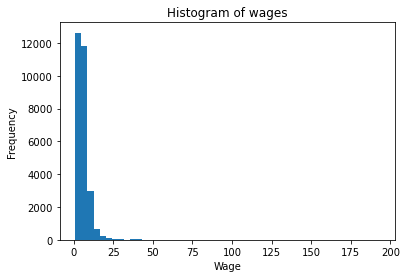

In [4]:
plt.hist(x = dataset["wage"],bins=50)
plt.ylabel("Frequency")
plt.xlabel("Wage")
plt.title("Histogram of wages")
plt.show()

<font size = "5" >

We can see similar outliers in age
- In this case a line would not produce a very good fit

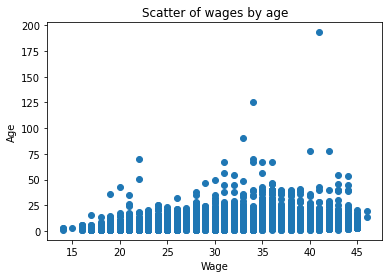

In [6]:
plt.scatter(x = dataset["age"],y = dataset["wage"])
plt.ylabel("Age")
plt.xlabel("Wage")
plt.title("Scatter of wages by age")
plt.show()

<font size = "5" >

### <span style="color:darkblue">  II. Poisson Regression </span>

The poisson regression assumes that 

$ \mathbb{E}[Y \mid X] = e^{\beta_0 + \beta_1X_1 + \beta_2X_2 + \cdots + \beta_K X_K }$

- Great way to model discrete count data
- Also great with heavy tailed data

In [22]:
# Construct data matrix 
y, X = \
    patsy.dmatrices('wage ~ age + tenure + race',
                       dataset)
y = np.ravel(y)

In [8]:
poisson_model = sm.GLM(y, X, family=sm.families.Poisson()).fit(cov_type= "HC1")
poisson_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                28101
Model:                            GLM   Df Residuals:                    28097
Model Family:                 Poisson   Df Model:                            3
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -70157.
Date:                Wed, 06 Mar 2024   Deviance:                       40563.
Time:                        11:41:33   Pearson chi2:                 6.16e+04
No. Iterations:                     5   Pseudo R-squ. (CS):             0.2312
Covariance Type:                  HC1                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3931      0.020     69.922      0.000       1.354       1.432
age            0.0153      0.001     20.955      0.000       0.014       0.017
tenure         0.0315      0.001     30.482      0.000       0.029       0.033
race          -0.1189      0.008    -15.191      0.000      -0.134      -0.104
==============================================================================
"""

<font size = "5">

Try it yourself

- Explore the dataset
- Explore 3 or four different specifications of the Poisson model
- Practice including a factor, an interaction, and a polynomial <br>
(see Lecture 11)

In [24]:
# Write your own code
dataset['age_race_interaction'] = dataset['age'] * dataset['race']
dataset['age_squared'] = dataset['age'] ** 2


y, X = \
    patsy.dmatrices('wage ~ age + race + age_race_interaction + age_squared',
                       dataset)
y = np.ravel(y)
poisson_model = sm.GLM(y, X, family=sm.families.Poisson()).fit(cov_type= "HC1")
poisson_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                28510
Model:                            GLM   Df Residuals:                    28505
Model Family:                 Poisson   Df Model:                            4
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -72206.
Date:                Wed, 06 Mar 2024   Deviance:                       43269.
Time:                        11:58:48   Pearson chi2:                 6.28e+04
No. Iterations:                     5   Pseudo R-squ. (CS):             0.1746
Covariance Type:                  HC1                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.2691      0.088      3.066      0.002       0.097       0.441
age                      0.0895      0.006     15.883      0.000       0.078       0.101
race                    -0.0810      0.034     -2.361      0.018      -0.148      -0.014
age_race_interaction    -0.0012      0.001     -0.971      0.332      -0.004       0.001
age_squared             -0.0011   9.23e-05    -11.397      0.000      -0.001      -0.001
========================================================================================
"""

<font size = "5">

Try it yourself

- Estimate your poisson model and a regression model using <br>
a training dataset
- Compute predictions for each model in a test dataset
- Which one performs better out-of-sample? You can use mean square error <br>
as a metric


In [28]:
# Write your own code

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

# Splitting the dataset into training and testing sets

dataset_clean = dataset.dropna(subset=['age', 'wage', 'race', 'age_race_interaction', 'age_squared'])
X = dataset_clean[['age', 'race' , 'age_race_interaction', 'age_squared']]
y = dataset_clean['wage']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Add a constant to the model (for statsmodels)
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)

# Poisson Regression Model
poisson_model = sm.GLM(y_train, X_train_sm, family=sm.families.Poisson()).fit(cov_type= "HC1")

# Linear Regression Model
linear_model = LinearRegression().fit(X_train, y_train)

# Predictions on test dataset
y_pred_poisson = poisson_model.predict(X_test_sm)
y_pred_linear = linear_model.predict(X_test)

# Compute Mean Squared Error (MSE) for both models
mse_poisson = mean_squared_error(y_test, y_pred_poisson)
mse_linear = mean_squared_error(y_test, y_pred_linear)

# Print the MSE for both models
print(f"Poisson Model MSE: {mse_poisson}")
print(f"Linear Regression Model MSE: {mse_linear}")

# Determine which model performs better
if mse_poisson < mse_linear:
    print("The Poisson model performs better out-of-sample.")
else:
    print("The Linear Regression model performs better out-of-sample.")



Poisson Model MSE: 14.490698282198963
Linear Regression Model MSE: 14.485763177894224
The Linear Regression model performs better out-of-sample.
